# LT 3 (Final Version)
v1.01  
*Changes: edited the text in 3a)*

#### Instructor

Joseph Benjamin R. Ilagan  
ITMGT 25 EE

#### Group Members:
    
1)  Ralph Francis Cruz
2)  Renz Shih
3)  Joseph Melliza
4)  Kenneth Uykingtian
5)  Ken Tio

Please submit through your group's Github Repository on or before **Thursday, 25 July 2019**, at **1:00PM**. 

Submission time be based on the email I will receive indicating that you have already uploaded your work for checking. 

If I don't receive any email from you, I will not check your answers. Any work submitted after **3:00 PM** will not be checked. Also, any work submitted after 1:00PM will have a maximum grade of 180 (out of the 200 total for the whole exam).

This time, I will not consider the timestamps in the repository as basis.

## Exploratory Data Analysis of Spotify track popularity in the Philippines

We will explore Spotify Philippines Top Hits data over the past year.

Spotify has made data available to the public through dedicated websites (for Charts) and through their Developer APIs.

Comma-Separated Value (CSV) files containing weekly Top 200 tracks from the [Spotify Charts](https://spotifycharts.com/regional/ph/weekly/latest) site have been downloaded for you and could be found in the **spotify_data** subdirectory.

### 1) Setup

Let's get a list of these csv files. Run the next two cells below.

In [1]:
import os
import re

In [2]:
file_dir = "./spotify_data"
file_list = os.listdir(file_dir)

#Filter to only .csv files
file_list = [f for f in filter(lambda x: re.search(r"\.csv$", x) , file_list)]

#Add directory prefix
file_list = [file_dir+"/"+f for f in file_list]
file_list

['./spotify_data/regional-ph-weekly-2018-07-13--2018-07-20.csv',
 './spotify_data/regional-ph-weekly-2018-07-20--2018-07-27.csv',
 './spotify_data/regional-ph-weekly-2018-07-27--2018-08-03.csv',
 './spotify_data/regional-ph-weekly-2018-08-03--2018-08-10.csv',
 './spotify_data/regional-ph-weekly-2018-08-10--2018-08-17.csv',
 './spotify_data/regional-ph-weekly-2018-08-17--2018-08-24.csv',
 './spotify_data/regional-ph-weekly-2018-08-24--2018-08-31.csv',
 './spotify_data/regional-ph-weekly-2018-08-31--2018-09-07.csv',
 './spotify_data/regional-ph-weekly-2018-09-07--2018-09-14.csv',
 './spotify_data/regional-ph-weekly-2018-09-14--2018-09-21.csv',
 './spotify_data/regional-ph-weekly-2018-09-21--2018-09-28.csv',
 './spotify_data/regional-ph-weekly-2018-09-28--2018-10-05.csv',
 './spotify_data/regional-ph-weekly-2018-10-05--2018-10-12.csv',
 './spotify_data/regional-ph-weekly-2018-10-12--2018-10-19.csv',
 './spotify_data/regional-ph-weekly-2018-10-19--2018-10-26.csv',
 './spotify_data/regional

We shall now load all csvs as one dataframe. Run the next few cells below.

In [3]:
import pandas as pd

In [4]:
# exclude first row per file
def load_csv(file_name):
    df = pd.read_csv(file_name, skiprows=1)
    df["file_name"] = file_name
    return df
    
df = pd.concat(map(load_csv, file_list))

In [5]:
df.head()

Position                      Track Name         Artist  Streams  \
0         1                  In My Feelings          Drake  2440707   
1         2  Girls Like You (feat. Cardi B)       Maroon 5  1491106   
2         3                           Mundo   IV Of Spades  1149887   
3         4                            2002     Anne-Marie  1117327   
4         5                     'Di Na Muli  Janine Teñoso  1084860   

                                                 URL  \
0  https://open.spotify.com/track/0bAkKNCQfWkexHF...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/6SFStUDQZNaGPKW...   
4  https://open.spotify.com/track/3VQb0rq27GPX92X...   

                                           file_name  
0  ./spotify_data/regional-ph-weekly-2018-07-13--...  
1  ./spotify_data/regional-ph-weekly-2018-07-13--...  
2  ./spotify_data/regional-ph-weekly-2018-07-13--...  
3  ./spotify_data/regional-ph-weekly-2018-07-13--...  
4  ./spotify_data/regional-ph-weekly-2018-07-13--...

In [6]:
df.tail()

Position                                Track Name          Artist  \
195       196                             What is Love?           TWICE   
196       197  Maybe This Time - From "Maybe This Time"  Sarah Geronimo   
197       198                             Old Town Road       Lil Nas X   
198       199                                        13            LANY   
199       200                                   Sandali         Because   

     Streams                                                URL  \
195   169908  https://open.spotify.com/track/5Ek40FyMPprcvty...   
196   169535  https://open.spotify.com/track/0Dljpp52vCmtXi0...   
197   169282  https://open.spotify.com/track/53CJANUxooaqGOt...   
198   168488  https://open.spotify.com/track/0WOvSEVpUGkNufX...   
199   168419  https://open.spotify.com/track/0WRSaei4JRI1KTY...   

                                        file_name  
195  ./spotify_data/regional-ph-weekly-latest.csv  
196  ./spotify_data/regional-ph-weekly-latest.csv  
197  ./spotify_data/regional-ph-weekly-latest.csv  
198  ./spotify_data/regional-ph-weekly-latest.csv  
199  ./spotify_data/regional-ph-weekly-latest.csv

In [7]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name'], dtype='object')

Note that the csv files don't have a lot of information in them.

Extract the beginning and ending days (yyyy-mm-dd) of the week as found in the file name.

The file names do have some bits of information we can use later. We can extract beginning and ending days of the week. Let's do that now. Run the cell below.

In [8]:
# Get beginning and ending days (yyyy-mm-dd) of the week as found in the file name
extracted_df = df.loc[:,"file_name"].str.extract(r"([0-9]{4}\-[0-9]{2}\-[0-9]{2})\--([0-9]{4}\-[0-9]{2}\-[0-9]{2})")
extracted_df.columns = ["begin_date","end_date"]
extracted_df.head()

begin_date    end_date
0  2018-07-13  2018-07-20
1  2018-07-13  2018-07-20
2  2018-07-13  2018-07-20
3  2018-07-13  2018-07-20
4  2018-07-13  2018-07-20

Add this new dataframe to the existing one. Go ahead and run the next cell.

In [9]:
#Add new columns to dataframe
df = pd.concat([df,extracted_df],axis=1)
df.head()

Position                      Track Name         Artist  Streams  \
0         1                  In My Feelings          Drake  2440707   
1         2  Girls Like You (feat. Cardi B)       Maroon 5  1491106   
2         3                           Mundo   IV Of Spades  1149887   
3         4                            2002     Anne-Marie  1117327   
4         5                     'Di Na Muli  Janine Teñoso  1084860   

                                                 URL  \
0  https://open.spotify.com/track/0bAkKNCQfWkexHF...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/6SFStUDQZNaGPKW...   
4  https://open.spotify.com/track/3VQb0rq27GPX92X...   

                                           file_name  begin_date    end_date  
0  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20  
1  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20  
2  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20  
3  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20  
4  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20

Notice the two new columns `begin_date` and `end_date` to the right of the dataframe.

#### 1a) Extract Track IDs

Spotify tracks are assigned a Track ID, which can be seen embedded in the URL data above. 

The hash-looking characters to the right of "https://open.spotify.com/track/" are the Track IDs. These are what we will extract next.

**Your turn:**

Let's extract that into its own column called **"Track ID"** in the dataframe.

**(10 points)**

In [10]:
## write your code below.
df.loc[:,"Track ID"] = df.loc[:,"URL"].apply(lambda x: re.sub("https://open.spotify.com/track/","", x) )
df.loc[:,"Track ID"]

0      0bAkKNCQfWkexHFn7fIKns
1      7fa9MBXhVfQ8P8Df9OEbD8
2      4u8RkgV6P4TLi89SmlUtv8
3      6SFStUDQZNaGPKWOx9ZiJB
4      3VQb0rq27GPX92X53Ni1Lc
5      3WUEs51GpcvlgU7lehLgLh
6      0ztDBQdQmdVZvorSmIjMih
7      2CWnuF7ht55Ajyeg4WPvWu
8      4hQ6UGyWQIGJmHSo0J88JW
9      3u1S1OmAUhx5DRlLrXqyp3
10     7gkWXbAxIYuvtOpcN3p9GJ
11     6LJ1p1h5EcMK4VPeCLDSoF
12     3BPoSr2pO34Aan6alFfVto
13     36ONiya0OANYknz0GgJmwB
14     3nc420PXjTdBV5TN0gCFkS
15     5SxkdsY1ufZzoq9iXceLw9
16     0WOvSEVpUGkNufX0w0M06F
17     1ZEm9cJC05rawV2tptNfTS
18     10Igtw8bSDyyFs7KIsKngZ
19     7Fg342AJtNsIDdwCfX0paC
20     76cy1WJvNGJTj78UqeA5zr
21     4Is1b37KJY9XVCgzp81FBW
22     09IStsImFySgyp0pIQdqAc
23     6kPJZM97LwdG9QIsT7khp6
24     0s3nnoMeVWz3989MkNQiRf
25     7ef4DlsgrMEH11cDZd32M6
26     2iUXsYOEPhVqEBwsqP70rE
27     00mBzIWv5gHOYxwuEJXjOG
28     3JJYIoJ5FyY9E0DGjr7SXF
29     2iOnWSWcChoGmUufbrQ00e
                ...          
170    2wVDWtLKXunswWecARNILj
171    29xs643Q96uQLD8f7SxYYw
172    1a1

In [12]:
## remnants of tests from the previous run are shown on the output area for your reference.

0     2G7V7zsVDxg1yRsu7Ew9RJ
1     7fa9MBXhVfQ8P8Df9OEbD8
2     4u8RkgV6P4TLi89SmlUtv8
3     4gB61mP4tNChn4LgfquMhi
4     3WUEs51GpcvlgU7lehLgLh
5     2BgD4nRyx9EZ5o8YEnjRSV
6     3VQb0rq27GPX92X53Ni1Lc
7     6SFStUDQZNaGPKWOx9ZiJB
8     5WvAo7DNuPRmk4APhdPzi8
9     2CWnuF7ht55Ajyeg4WPvWu
10    0ztDBQdQmdVZvorSmIjMih
11    3u1S1OmAUhx5DRlLrXqyp3
12    0d2iYfpKoM0QCKvcLCkBao
13    00mBzIWv5gHOYxwuEJXjOG
14    7gkWXbAxIYuvtOpcN3p9GJ
15    4Is1b37KJY9XVCgzp81FBW
16    3BPoSr2pO34Aan6alFfVto
17    4keoy2fqgwGnbWlm3ZVZFa
18    3nc420PXjTdBV5TN0gCFkS
19    10Igtw8bSDyyFs7KIsKngZ
Name: URL, dtype: object

In [11]:
## check your work here
df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                               2002   
4           5                                        'Di Na Muli   
5           6                                       Kathang Isip   
6           7                                            Tagpuan   
7           8                            DDU-DU DDU-DU - KR Ver.   
8           9  Back To You - From 13 Reasons Why – Season 2 S...   
9          10                                               Rise   
10         11                                     God is a woman   
11         12                                           Nadarang   
12         13                                        BBoom BBoom   
13         14                                 Don’t Matter To Me   
14         15                               Ocean (feat. Khalid)   
15         16                               no tears left to cry   
16         17                                                 13   
17         18                          Bed (feat. Ariana Grande)   
18         19                  Freaky Friday (feat. Chris Brown)   
19         20                                             Let Me   
20         21                                              IDGAF   
21         22                                               BAAM   
22         23                                         The Middle   
23         24                           Solo (feat. Demi Lovato)   
24         25                                       Lucid Dreams   
25         26                           One Kiss (with Dua Lipa)   
26         27                                         Youngblood   
27         28                              Sa Ngalan Ng Pag-Ibig   
28         29                                            Enemies   
29         30                                        Tagu-Taguan   
..        ...                                                ...   
170       171                                               SOLO   
171       172                                              Sa'yo   
172       173                                          Breakeven   
173       174          Close To Me (with Diplo) (feat. Swae Lee)   
174       175                                   Treat You Better   
175       176   I Think I'm OKAY (with YUNGBLUD & Travis Barker)   
176       177  Dying Inside To Hold You - From " All Of You" ...   
177       178                    Your Song (My One and Only You)   
178       179          Heartbeat (BTS World Original Soundtrack)   
179       180                                             No One   
180       181  Back To You - From 13 Reasons Why – Season 2 S...   
181       182                                Before I Let You Go   
182       183                                          Ikaw Lang   
183       184                                           BIRTHDAY   
184       185                                             Lights   
185       186           BLOW (with Chris Stapleton & Bruno Mars)   
186       187                                                 Ex   
187       188                                          Big Plans   
188       189                        When You Say Nothing At All   
189       190                                BOOMBAYAH - KR Ver.   
190       191                                     Ipagpatawad Mo   
191       192                                         Kontrabida   
192       193              There's No Way (feat. Julia Michaels)   
193       194                                    I Love You 3000   
194       195           break up with your girlfriend, i'm bored   
195       196                                      What is Love?   
196       197           Maybe This Time - From "Maybe This Ti

In [13]:
## remnants of the output from a previous run are shown below for reference

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

### 2) Working with Master Data

We need more detailed information about the things of significance we are analyzing. In particular, we need to know more about the individual tracks (including audio features such as energy, danceability, or speechiness) and artists (including name and genres). 

Spotify provides an Application Programming Interface (API) to allow software developers to access these pieces of information through web services. 

We've previously used these APIs to extract master data based on the specific tracks found in the PH Top 200 weekly data loaded in the dataframe above. 

We shall now load tracks from JSON file **tracks.json**. The data was previously extracted via the Spotify Web API.

The keys and values are taken from the [Spotify Web API Documentation Page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/).

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>album</td>
      <td>a simplified <a href="/documentation/web-api/reference/object-model/#album-object-simplified">album object</a></td>
      <td>The album on which the track appears. The album object includes a link in <code class="highlighter-rouge">href</code> to full information about the album.</td>
    </tr>
    <tr>
      <td>artists</td>
      <td>an array of simplified <a href="/documentation/web-api/reference/object-model/#artist-object-simplified">artist objects</a></td>
      <td>The artists who performed the track. Each artist object includes a link in <code class="highlighter-rouge">href</code> to more detailed information about the artist.</td>
    </tr>
    <tr>
      <td>available_markets</td>
      <td>array of strings</td>
      <td>A list of the countries in which the track can be played, identified by their <a href="http://en.wikipedia.org/wiki/ISO_3166-1_alpha-2">ISO 3166-1 alpha-2</a> code.</td>
    </tr>
    <tr>
      <td>disc_number</td>
      <td>integer</td>
      <td>The disc number (usually <code class="highlighter-rouge">1</code> unless the album consists of more than one disc).</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>integer</td>
      <td>The track length in milliseconds.</td>
    </tr>
    <tr>
      <td>explicit</td>
      <td>Boolean</td>
      <td>Whether or not the track has explicit lyrics ( <code class="highlighter-rouge">true</code> = yes it does; <code class="highlighter-rouge">false</code> = no it does not OR unknown).</td>
    </tr>
    <tr>
      <td>external_ids</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-id-object">external ID object</a></td>
      <td>Known external IDs for the track.</td>
    </tr>
    <tr>
      <td>external_urls</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-url-object">external URL object</a></td>
      <td>Known external URLs for this track.</td>
    </tr>
    <tr>
      <td>href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify ID</a> for the track.</td>
    </tr>
    <tr>
      <td>is_playable</td>
      <td>boolean</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied. If <code class="highlighter-rouge">true</code> , the track is playable in the given market. Otherwise <code class="highlighter-rouge">false</code>.</td>
    </tr>
    <tr>
      <td>linked_from</td>
      <td>a <a href="/documentation/web-api/reference/object-model/#track-link">linked track object</a></td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, and the requested track has been replaced with different track. The track in the <code class="highlighter-rouge">linked_from</code> object contains information about the originally requested track.</td>
    </tr>
    <tr>
      <td>restrictions</td>
      <td>a restrictions object</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, the original track is not available in the given market, and Spotify did not have any tracks to relink it with. The track response will still contain metadata for the original track, and a restrictions object containing the reason why the track is not available: <code class="highlighter-rouge">"restrictions" : {"reason" : "market"}</code></td>
    </tr>
    <tr>
      <td>name</td>
      <td>string</td>
      <td>The name of the track.</td>
    </tr>
    <tr>
      <td>popularity</td>
      <td>integer</td>
      <td>The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.<br />The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.<br />Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.</td>
    </tr>
    <tr>
      <td>preview_url</td>
      <td>string</td>
      <td>A link to a 30 second preview (MP3 format) of the track. Can be <code class="highlighter-rouge">null</code></td>
    </tr>
    <tr>
      <td>track_number</td>
      <td>integer</td>
      <td>The number of the track. If an album has several discs, the track number is the number on the specified disc.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “track”.</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify URI</a> for the track.</td>
    </tr>
  </tbody>
</table>

Let's go ahead and load these files.

In [12]:
import json

with open(file_dir+"/tracks.json","r") as tracks_file:
    tracks = json.load(tracks_file)

In [13]:
# display first 20 tracks only
tracks[:20]

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
     'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
     'id': '3TVXtAsR1Inumwj472S9r4',
     'name': 'Drake',
     'type': 'artist',
     'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/1ATL5GLyefJaxhQzSPVrLX'},
   'href': 'https://api.spotify.com/v1/albums/1ATL5GLyefJaxhQzSPVrLX',
   'id': '1ATL5GLyefJaxhQzSPVrLX',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/542d705154be4049fc927050d006987e63739bbd',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/239ec906572231368d8ebd72614094bd3bd10b33',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/f12257240bbec6ddfa780253ac939e646eba2a36',
     'width': 64}],
   'name': 'Scorpion',
   'release_date': '2018-06-29',
   'release_date_precision': 

Let's compare the **original_id** and the **id** of the track master data. You'll note that some entries don't match, and this may cause problems when you try cross-referencing what is included in Spotify Charts data and what's actually included in the API data. Go on, run the next cell.

In [14]:
[(t["original_id"],t["id"]) for t in tracks]

[('2G7V7zsVDxg1yRsu7Ew9RJ', '2G7V7zsVDxg1yRsu7Ew9RJ'),
 ('7fa9MBXhVfQ8P8Df9OEbD8', '7fa9MBXhVfQ8P8Df9OEbD8'),
 ('4u8RkgV6P4TLi89SmlUtv8', '4u8RkgV6P4TLi89SmlUtv8'),
 ('4gB61mP4tNChn4LgfquMhi', '7GbAp0HKPQW7WnFJAzMoRk'),
 ('3WUEs51GpcvlgU7lehLgLh', '3WUEs51GpcvlgU7lehLgLh'),
 ('2BgD4nRyx9EZ5o8YEnjRSV', '2BgD4nRyx9EZ5o8YEnjRSV'),
 ('3VQb0rq27GPX92X53Ni1Lc', '6p6DiqAPwMX7vdrSo30wgo'),
 ('6SFStUDQZNaGPKWOx9ZiJB', '2BgEsaKNfHUdlh97KmvFyo'),
 ('5WvAo7DNuPRmk4APhdPzi8', '5WvAo7DNuPRmk4APhdPzi8'),
 ('2CWnuF7ht55Ajyeg4WPvWu', '7b8YOVV5quZcSKEijDgyWB'),
 ('0ztDBQdQmdVZvorSmIjMih', '0ztDBQdQmdVZvorSmIjMih'),
 ('3u1S1OmAUhx5DRlLrXqyp3', '3u1S1OmAUhx5DRlLrXqyp3'),
 ('0d2iYfpKoM0QCKvcLCkBao', '0d2iYfpKoM0QCKvcLCkBao'),
 ('00mBzIWv5gHOYxwuEJXjOG', '00mBzIWv5gHOYxwuEJXjOG'),
 ('7gkWXbAxIYuvtOpcN3p9GJ', '5OCJzvD7sykQEKHH7qAC3C'),
 ('4Is1b37KJY9XVCgzp81FBW', '4Is1b37KJY9XVCgzp81FBW'),
 ('3BPoSr2pO34Aan6alFfVto', '3BPoSr2pO34Aan6alFfVto'),
 ('4keoy2fqgwGnbWlm3ZVZFa', '4keoy2fqgwGnbWlm3ZVZFa'),
 ('3nc420P

#### 2a) Create a dictionary `tracks_dict` whose keys are the track ids (with attribute "id") and the values are dictionaries with the following attributes and values:

We need a fast, in-memory placeholder of tracks data where we could simply reference additional track attributes via some key (in our specific case, the Track ID, or rather, the Original ID). In Python, this can be achieved through a **dictionary**.

Recall that dictionaries can have subdictionaries in them. Create a dictionary whose keys are the original ids and the values are dictionaries containing the following attributes:

- "name" (Track Name)
- "duration_ms" (Duration in Milliseconds)
- "artist_id" (ID of the first artist in a list of artists)
- "artist_name" (Name of the first artist in a list of artists)

**(20 points)**


In [16]:
tracks_dict = {}

## write code below

for i in tracks:
    counter = 0
    name = i["name"]
    song_id = i["original_id"]
    duration_ms = i["duration_ms"]
    artist_id = i['artists'][counter]['id']
    artist_name = i["artists"][counter]['name']
    tracks_dict[song_id] = {'name':name,'id':song_id,'duration_ms':duration_ms,'artist_id':artist_id,'artist_name':artist_name}
    counter += 1
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5'},
 '4u8RkgV6P4TLi89SmlUtv8': {'name': 'Mundo',
  'id': '4u8RkgV6P4TLi89SmlUtv8',
  'duration_ms': 349713,
  'artist_id': '4k9wp4ipHdA1bu1T4x1ZTG',
  'artist_name': 'IV Of Spades'},
 '4gB61mP4tNChn4LgfquMhi': {'name': 'Thru These Tears',
  'id': '4gB61mP4tNChn4LgfquMhi',
  'duration_ms': 204515,
  'artist_id': '49tQo2QULno7gxHutgccqF',
  'artist_name': 'LANY'},
 '3WUEs51GpcvlgU7lehLgLh': {'name': 'Kathang Isip',
  'id': '3WUEs51GpcvlgU7lehLgLh',
  'duration_ms': 318814,
  'artist_id': '4DAcJXcjX0zlQAZAPAx4Zb',
  'artist_name': 'Ben&Ben'},
 '2BgD4nRyx9EZ5o8YEnjRSV': {'name': "Kung 'Di Rin Lang Ikaw",
  'id': '2BgD4n

In [22]:
## remnants from previous run are shown on the output below for your reference
## -----------------

[{'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake'},
 {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5'},
 {'name': 'Mundo',
  'id': '4u8RkgV6P4TLi89SmlUtv8',
  'duration_ms': 349713,
  'artist_id': '4k9wp4ipHdA1bu1T4x1ZTG',
  'artist_name': 'IV Of Spades'},
 {'name': 'Thru These Tears',
  'id': '7GbAp0HKPQW7WnFJAzMoRk',
  'duration_ms': 204515,
  'artist_id': '49tQo2QULno7gxHutgccqF',
  'artist_name': 'LANY'},
 {'name': 'Kathang Isip',
  'id': '3WUEs51GpcvlgU7lehLgLh',
  'duration_ms': 318814,
  'artist_id': '4DAcJXcjX0zlQAZAPAx4Zb',
  'artist_name': 'Ben&Ben'},
 {'name': "Kung 'Di Rin Lang Ikaw",
  'id': '2BgD4nRyx9EZ5o8YEnjRSV',
  'duration_ms': 267759,
  'artist_id': '4qFxP3qN9GsnZDOkAE6x2m',
  'artist_name': 'December Avenue'},
 {'name': "'Di Na Muli",
  'id': '

In [23]:
# display tracks_dict to verify changes
## remnants from previous run shown below for your reference
## write code below
## ----------------
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5'},
 '4u8RkgV6P4TLi89SmlUtv8': {'name': 'Mundo',
  'id': '4u8RkgV6P4TLi89SmlUtv8',
  'duration_ms': 349713,
  'artist_id': '4k9wp4ipHdA1bu1T4x1ZTG',
  'artist_name': 'IV Of Spades'},
 '4gB61mP4tNChn4LgfquMhi': {'name': 'Thru These Tears',
  'id': '7GbAp0HKPQW7WnFJAzMoRk',
  'duration_ms': 204515,
  'artist_id': '49tQo2QULno7gxHutgccqF',
  'artist_name': 'LANY'},
 '3WUEs51GpcvlgU7lehLgLh': {'name': 'Kathang Isip',
  'id': '3WUEs51GpcvlgU7lehLgLh',
  'duration_ms': 318814,
  'artist_id': '4DAcJXcjX0zlQAZAPAx4Zb',
  'artist_name': 'Ben&Ben'},
 '2BgD4nRyx9EZ5o8YEnjRSV': {'name': "Kung 'Di Rin Lang Ikaw",
  'id': '2BgD4n

---  


We will now load tracks from JSON file **audio_features.json**. The data was previously extracted via the Spotify Web API. The keys and values are taken from the description in the [Spotify Web API documentation page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/). 

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>acousticness</td>
      <td>float</td>
      <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
    </tr>
    <tr>
      <td>analysis_url</td>
      <td>string</td>
      <td>An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.</td>
    </tr>
    <tr>
      <td>danceability</td>
      <td>float</td>
      <td>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>int</td>
      <td>The duration of the track in milliseconds.</td>
    </tr>
    <tr>
      <td>energy</td>
      <td>float</td>
      <td>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The Spotify ID for the track.</td>
    </tr>
    <tr>
      <td>instrumentalness</td>
      <td>float</td>
      <td>Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
    </tr>
    <tr>
      <td>key</td>
      <td>int</td>
      <td>The key the track is in. Integers map to pitches using standard <a href="https://en.wikipedia.org/wiki/Pitch_class">Pitch Class notation</a> . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.</td>
    </tr>
    <tr>
      <td>liveness</td>
      <td>float</td>
      <td>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
    </tr>
    <tr>
      <td>loudness</td>
      <td>float</td>
      <td>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.</td>
    </tr>
    <tr>
      <td>mode</td>
      <td>int</td>
      <td>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
    </tr>
    <tr>
      <td>speechiness</td>
      <td>float</td>
      <td>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
    </tr>
    <tr>
      <td>tempo</td>
      <td>float</td>
      <td>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.</td>
    </tr>
    <tr>
      <td>time_signature</td>
      <td>int</td>
      <td>An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).</td>
    </tr>
    <tr>
      <td>track_href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “audio_features”</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The Spotify URI for the track.</td>
    </tr>
    <tr>
      <td>valence</td>
      <td>float</td>
      <td>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
    </tr>
  </tbody>
</table>

Let's proceed with running the next few cells.

In [17]:
import json

with open(file_dir+"/audio_features.json","r") as audio_features_file:
    audio_features = json.load(audio_features_file)

In [18]:
audio_features[:20]

[{'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 {'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode': 1,
  'speechiness': 0.0505,
  'acousticness': 0.568,
  'instrumentalness': 0,
  'liveness': 0.13,
  'valence': 0.448,
  'tempo': 124.959,
  'type': 'audio_features',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'uri': 'spotify:track:7fa9MBXhVfQ8P8Df9OEbD8',
  'track_href': 'https://api.spotify.com/v1/tracks/7fa9MBXhVfQ8P8Df9OE

#### 2b) Add audio features attributes to `tracks_dict`

For convenience, we shall update the `tracks_dict` dictionary with more attributes from the audio_features data we just uploaded.

Use the key 'original_id' as basis to update tracks_dict. Note that the `audio_features` dictionary entries also have the 'original_id' key so use that.

**Hint:** one way to do this is through the use of the `dict.update()` method. If we were not able to cover this in class, now is the time to do research.

**(10 points)**

In [21]:
## write code below
## --------------------

counter = 0
for i in tracks_dict:
    audio_features_item = audio_features[counter]
    tracks_dict[i].update(audio_features_item)
    counter +=1
print(len(tracks_dict))
tracks_dict

794


{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5',
  'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode':

In [27]:
# inspect tracks_dict to determine if the audio_features attributes have been carried over
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5',
  'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode':

After running the previous cell, you should notice the new subdictionary attributes included.

In [28]:
len(tracks_dict)

794

The number of tracks is visibly lower than the number of records we uploaded from the Charts data. This is understandable as we are now working with unique (original) Track IDs.

Finally, we will now load tracks from JSON file **artists.json**. The data was previously extracted via the Spotify Web API. Go ahead and run the next few cells.

In [22]:
import json

with open(file_dir+"/artists.json","r") as artists_file:
    artists = json.load(artists_file)

Let's take a look at the first 5 entries:

In [23]:
artists[:5]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ydoSd3N2mwgwBHtF6K7eX'},
  'followers': {'href': None, 'total': 1349550},
  'genres': ['australian pop', 'pop'],
  'href': 'https://api.spotify.com/v1/artists/6ydoSd3N2mwgwBHtF6K7eX',
  'id': '6ydoSd3N2mwgwBHtF6K7eX',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/1134c6cc39953feb998c83d5a7356ce6d1548a5c',
    'width': 640},
   {'height': 320,
    'url': 'https://i.scdn.co/image/87e98ba41d0405dd4a0a5aeca6f5f1ffea5a29bf',
    'width': 320},
   {'height': 160,
    'url': 'https://i.scdn.co/image/c016cd05bbb2e12a1e5d6d40e6e38f27363eb038',
    'width': 160}],
  'name': 'Calum Scott',
  'popularity': 78,
  'type': 'artist',
  'uri': 'spotify:artist:6ydoSd3N2mwgwBHtF6K7eX'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5qRSs6mvI17zrkJpOHkCoM'},
  'followers': {'href': None, 'total': 1907419},
  'genres': ['k-pop', 'k-pop boy group'],
  'href': 'https://api.spotify.com/v1/artists/5qRSs6mvI17z

#### 2c) Create a dictionary `artists_dict` whose keys are the artist ids (with attribute "id") and the values are dictionaries with the following attributes and values:

Similar to tracks, we need an easy mechanism to look up Artist master data simply by using the artist id as key.

Let's prepare a new dictionary `artists_dict` with the following attributes:

- "name" (Track Name)
- "genres" (Genres of the Artist)

Be careful to note that the value of `genres` is actually a list. This is perfectly fine in a dictionary setup, but be aware that there could be one or more genres attributed to each Artist.

**(10 points)**

In [26]:
## write code below
## ------------------------
artists_dict = {}
for i in artists:
    artist_id = i['id']
    artist_name = i['name']
    genres = i['genres']
    artist_data = {artist_id:{'name':artist_name,'genres':genres}}
    artists_dict.update(artist_data)
print(len(artists_dict))
artists_dict

304


{'6ydoSd3N2mwgwBHtF6K7eX': {'name': 'Calum Scott',
  'genres': ['australian pop', 'pop']},
 '5qRSs6mvI17zrkJpOHkCoM': {'name': 'iKON',
  'genres': ['k-pop', 'k-pop boy group']},
 '09Xydf4dlkr29dH99DmsvQ': {'name': 'Janine Teñoso', 'genres': ['opm']},
 '74KM79TiuVKeVCqs8QtB0B': {'name': 'Sabrina Carpenter',
  'genres': ['dance pop', 'pop', 'post-teen pop', 'viral pop']},
 '0DnjaQqb436AH1idffI6CQ': {'name': 'Yeng Constantino',
  'genres': ['classic opm', 'opm']},
 '6aiCKnIN68hohzU3ZzNq48': {'name': 'Sarah Geronimo',
  'genres': ['classic opm', 'opm']},
 '6k0IBR0lU42s2GYpNX7kA9': {'name': 'Brian McKnight',
  'genres': ['dance pop',
   'neo soul',
   'new jack swing',
   'quiet storm',
   'r&b',
   'urban contemporary']},
 '6USv9qhCn6zfxlBQIYJ9qs': {'name': 'Dominic Fike',
  'genres': ['alternative pop rock']},
 '4BNWanhw4AjSXjBm9L1Jzy': {'name': 'Juris', 'genres': ['classic opm', 'opm']},
 '5qa31A9HySw3T7MKWI9bGg': {'name': 'FLETCHER',
  'genres': ['dance pop',
   'electropop',
   'indie 

Let's inspect the new dictionary:

In [32]:
## remnants from previous run shown below for your reference
artists_dict

{'6ydoSd3N2mwgwBHtF6K7eX': {'name': 'Calum Scott',
  'genres': ['australian pop', 'pop']},
 '5qRSs6mvI17zrkJpOHkCoM': {'name': 'iKON',
  'genres': ['k-pop', 'k-pop boy group']},
 '09Xydf4dlkr29dH99DmsvQ': {'name': 'Janine Teñoso', 'genres': ['opm']},
 '74KM79TiuVKeVCqs8QtB0B': {'name': 'Sabrina Carpenter',
  'genres': ['dance pop', 'pop', 'post-teen pop', 'viral pop']},
 '0DnjaQqb436AH1idffI6CQ': {'name': 'Yeng Constantino',
  'genres': ['classic opm', 'opm']},
 '6aiCKnIN68hohzU3ZzNq48': {'name': 'Sarah Geronimo',
  'genres': ['classic opm', 'opm']},
 '6k0IBR0lU42s2GYpNX7kA9': {'name': 'Brian McKnight',
  'genres': ['dance pop',
   'neo soul',
   'new jack swing',
   'quiet storm',
   'r&b',
   'urban contemporary']},
 '6USv9qhCn6zfxlBQIYJ9qs': {'name': 'Dominic Fike',
  'genres': ['alternative pop rock']},
 '4BNWanhw4AjSXjBm9L1Jzy': {'name': 'Juris', 'genres': ['classic opm', 'opm']},
 '5qa31A9HySw3T7MKWI9bGg': {'name': 'FLETCHER',
  'genres': ['dance pop',
   'electropop',
   'indie 

In [33]:
len(artists_dict)

304

#### 2d) Add **artist_genre** attribute per track in the tracks_dict dictionary. 

We are assuming for now that tracks inherit directly the genre from the artist and that no tracks deviate from the artist's general genre.

Again, for convenience, let's beef up tracks_dict with more attributes, this time from the artist data we just prepared. Assign a new attribute "artist_genre" in `tracks_dict`.

**Hint:** Note that `tracks_dict` has an "artist_id" attribute; use this to look up the attributes from `artists_dict`.


**(15 points)**

In [31]:
## Write code below
## ----------------
for i in tracks_dict:
    artist_identity = tracks_dict[i]['artist_id']
    artist_genre = artists_dict[artist_identity]['genres']
    tracks_dict[i]["artist_genre"] = artist_genre
print(len(tracks_dict))
tracks_dict

794


{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'artist_genre': ['canadian hip hop',
   'canadian pop',
   'hip hop',
   'pop rap',
   'rap',
   'toronto rap']},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
 

#### 2e) Inspect **tracks_dict** and verify that the entries now have the 'artist_genres' property.

**(3 points)**

In [30]:
tracks_dict["2G7V7zsVDxg1yRsu7Ew9RJ"]["artist_genre"]

['canadian hip hop',
 'canadian pop',
 'hip hop',
 'pop rap',
 'rap',
 'toronto rap']

In [248]:
## remnants from previous run shown below for your reference

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'artist_genres': ['canadian hip hop',
   'canadian pop',
   'hip hop',
   'pop rap',
   'rap',
   'toronto rap']},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',


In [37]:
# verify that the length of tracks_dict is still the same
len(tracks_dict)

794

### 3) More Data Transformation: Feature Extractions and Aggregations

We shall revisit our original dataframe and introduce additional columns to make our analysis and insights easier in the succeeding numbers.

Let's display the head of the dataframe `df` here again. Go ahead and run the next cell.

In [32]:
df.head()

Position                      Track Name         Artist  Streams  \
0         1                  In My Feelings          Drake  2440707   
1         2  Girls Like You (feat. Cardi B)       Maroon 5  1491106   
2         3                           Mundo   IV Of Spades  1149887   
3         4                            2002     Anne-Marie  1117327   
4         5                     'Di Na Muli  Janine Teñoso  1084860   

                                                 URL  \
0  https://open.spotify.com/track/0bAkKNCQfWkexHF...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/6SFStUDQZNaGPKW...   
4  https://open.spotify.com/track/3VQb0rq27GPX92X...   

                                           file_name  begin_date    end_date  \
0  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   
1  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   
2  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   
3  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   
4  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   

                 Track ID  
0  0bAkKNCQfWkexHFn7fIKns  
1  7fa9MBXhVfQ8P8Df9OEbD8  
2  4u8RkgV6P4TLi89SmlUtv8  
3  6SFStUDQZNaGPKWOx9ZiJB  
4  3VQb0rq27GPX92X53Ni1Lc

In [33]:
type(df)

pandas.core.frame.DataFrame

#### 3a) Add audio feature columns to the dataframe  

Let's add the following:
* Genres ("artist_genres" key will be mapped to "genres")
* Danceability ("danceability")
* Energy ("energy")
* Loudness ("loudness")
* Mode ("mode")
* Speechiness ("speechiness")
* Acousticness ("acousticness")
* Instrumentalness ("instrumentalness")
* Liveness ("liveness")
* Valence ("valence")
* Tempo ("tempo")

  
We will use the Pandas `df.apply(...)` with a lambda function method to perform this task. 

We will create a new dataframe from the original one and then assign to new columns in the original dataframe.

**(15 points)**

In [34]:
## write code below
## -------------------
df.loc[:,"acousticness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["acousticness"])
df.loc[:,"danceability"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["danceability"])
df.loc[:,"energy"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["energy"])
df.loc[:,"genres"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["artist_genre"])
df.loc[:,"instrumentalness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["instrumentalness"])
df.loc[:,"liveness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["liveness"])
df.loc[:,"loudness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["loudness"])
df.loc[:,"mode"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["mode"])
df.loc[:,"speechiness"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["speechiness"])
df.loc[:,"tempo"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["tempo"])
df.loc[:,"valence"] = df.loc[:,"Track ID"].apply(lambda x: tracks_dict[x]["valence"])
df
## -------------------

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                               2002   
4           5                                        'Di Na Muli   
5           6                                       Kathang Isip   
6           7                                            Tagpuan   
7           8                            DDU-DU DDU-DU - KR Ver.   
8           9  Back To You - From 13 Reasons Why – Season 2 S...   
9          10                                               Rise   
10         11                                     God is a woman   
11         12                                           Nadarang   
12         13                                        BBoom BBoom   
13         14                                 Don’t Matter To Me   
14         15                               Ocean (feat. Khalid)   
15         16                               no tears left to cry   
16         17                                                 13   
17         18                          Bed (feat. Ariana Grande)   
18         19                  Freaky Friday (feat. Chris Brown)   
19         20                                             Let Me   
20         21                                              IDGAF   
21         22                                               BAAM   
22         23                                         The Middle   
23         24                           Solo (feat. Demi Lovato)   
24         25                                       Lucid Dreams   
25         26                           One Kiss (with Dua Lipa)   
26         27                                         Youngblood   
27         28                              Sa Ngalan Ng Pag-Ibig   
28         29                                            Enemies   
29         30                                        Tagu-Taguan   
..        ...                                                ...   
170       171                                               SOLO   
171       172                                              Sa'yo   
172       173                                          Breakeven   
173       174          Close To Me (with Diplo) (feat. Swae Lee)   
174       175                                   Treat You Better   
175       176   I Think I'm OKAY (with YUNGBLUD & Travis Barker)   
176       177  Dying Inside To Hold You - From " All Of You" ...   
177       178                    Your Song (My One and Only You)   
178       179          Heartbeat (BTS World Original Soundtrack)   
179       180                                             No One   
180       181  Back To You - From 13 Reasons Why – Season 2 S...   
181       182                                Before I Let You Go   
182       183                                          Ikaw Lang   
183       184                                           BIRTHDAY   
184       185                                             Lights   
185       186           BLOW (with Chris Stapleton & Bruno Mars)   
186       187                                                 Ex   
187       188                                          Big Plans   
188       189                        When You Say Nothing At All   
189       190                                BOOMBAYAH - KR Ver.   
190       191                                     Ipagpatawad Mo   
191       192                                         Kontrabida   
192       193              There's No Way (feat. Julia Michaels)   
193       194                                    I Love You 3000   
194       195           break up with your girlfriend, i'm bored   
195       196                                      What is Love?   
196       197           Maybe This Time - From "Maybe This Ti

In [43]:
## remnants from previous run shown below for your reference
df

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                   Thru These Tears   
4           5                                       Kathang Isip   
5           6                             Kung 'Di Rin Lang Ikaw   
6           7                                        'Di Na Muli   
7           8                                               2002   
8           9                                         No Brainer   
9          10                            DDU-DU DDU-DU - KR Ver.   
10         11                                            Tagpuan   
11         12                                               Rise   
12         13                    Eastside (with Halsey & Khalid)   
13         14                              Sa Ngalan Ng Pag-Ibig   
14         15                                     God is a woman   
15         16                                               BAAM   
16         17                                        BBoom BBoom   
17         18                                          Happy Now   
18         19                               Ocean (feat. Khalid)   
19         20                  Freaky Friday (feat. Chris Brown)   
20         21                                         I'm a Mess   
21         22                                           Nadarang   
22         23  Back To You - From 13 Reasons Why – Season 2 S...   
23         24                                              IDGAF   
24         25                                                 13   
25         26                                            Happier   
26         27                                         The Middle   
27         28                                            Tadhana   
28         29                                         Connection   
29         30                           Solo (feat. Demi Lovato)   
..        ...                                                ...   
170       171                                   A Thousand Years   
171       172                                      LOVE SCENARIO   
172       173                                      I'll Never Go   
173       174                                 That's What I Like   
174       175                               Ocean (feat. Khalid)   
175       176                                 This I Promise You   
176       177                                          Terrified   
177       178                          High On Life (feat. Bonn)   
178       179                                              Lucky   
179       180                         Collide - Acoustic Version   
180       181                                           Ako Muna   
181       182                               Say You Won’t Let Go   
182       183                            Fall for You (Acoustic)   
183       184                                              Stars   
184       185                Perfect Duet (Ed Sheeran & Beyoncé)   
185       186                                       I Fall Apart   
186       187                                Body (feat. Brando)   
187       188                                               SAD!   
188       189                                   A Thousand Miles   
189       190                               Just the Way You Are   
190       191                                       Chasing Cars   
191       192                                          FAKE LOVE   
192       193                                          sweetener   
193       194                               Versace on the Floor   
194       195                                           All I Am   
195       196                         Rumors (with Sofia Carson)   
196       197                                  Never Be the S

In [35]:
## write code below )to check the structure and length of the altered dataframe
## ----------------------------------------------------------------------------
print(len(df))
df.head()

10600


Position                      Track Name         Artist  Streams  \
0         1                  In My Feelings          Drake  2440707   
1         2  Girls Like You (feat. Cardi B)       Maroon 5  1491106   
2         3                           Mundo   IV Of Spades  1149887   
3         4                            2002     Anne-Marie  1117327   
4         5                     'Di Na Muli  Janine Teñoso  1084860   

                                                 URL  \
0  https://open.spotify.com/track/0bAkKNCQfWkexHF...   
1  https://open.spotify.com/track/7fa9MBXhVfQ8P8D...   
2  https://open.spotify.com/track/4u8RkgV6P4TLi89...   
3  https://open.spotify.com/track/6SFStUDQZNaGPKW...   
4  https://open.spotify.com/track/3VQb0rq27GPX92X...   

                                           file_name  begin_date    end_date  \
0  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   
1  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   
2  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   
3  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   
4  ./spotify_data/regional-ph-weekly-2018-07-13--...  2018-07-13  2018-07-20   

                 Track ID  acousticness  danceability  energy  \
0  0bAkKNCQfWkexHFn7fIKns       0.00623         0.735   0.482   
1  7fa9MBXhVfQ8P8Df9OEbD8       0.56800         0.851   0.541   
2  4u8RkgV6P4TLi89SmlUtv8       0.17600         0.705   0.401   
3  6SFStUDQZNaGPKWOx9ZiJB       0.03720         0.697   0.683   
4  3VQb0rq27GPX92X53Ni1Lc       0.19200         0.413   0.561   

                                              genres  instrumentalness  \
0  [canadian hip hop, canadian pop, hip hop, pop ...          0.014400   
1                                              [pop]          0.000000   
2         [opm, pinoy indie, pinoy rock, pinoy trap]          0.000009   
3  [dance pop, pop, post-teen pop, tropical house...          0.000000   
4                                              [opm]          0.000000   

   liveness  loudness  mode  speechiness    tempo  valence  
0    0.4480    -9.445     1       0.1390  181.995    0.315  
1    0.1300    -6.825     1       0.0505  124.959    0.448  
2    0.0735    -8.900     1       0.0376  140.031    0.481  
3    0.1370    -2.881     0       0.1170   96.133    0.603  
4    0.0914    -3.092     1       0.0517   88.690    0.352

In [44]:
len(df)

10600

#### 3b) Extract genres
  
Prepare a tally board named `genre_tally_dict` that counts the number of streams of a particular genre across all tracks in the dataframe. Note that the **"genres"** column contains lists, so you may have to go through the elements of each list.

Make a copy of the dataframe.
  
**Be careful:** we are counting streams, not simple occurrences. We are accumulating stream counts, so you might get confused with a previous test or exercise involving word counts.

**(15 points)**

In [36]:
## write code below
## -------------------------
genre_tally_dict = {}
for i in range(df['file_name'].count()):
    for j in range(len(df.iloc[i,12])):
        genre_tally_dict[df.iloc[i,12][j]] = 0
for i in range(df['file_name'].count()):
    for j in range(len(df.iloc[i,12])):
        genre_tally_dict[df.iloc[i,12][j]] += df.iloc[i,3]
genre_tally_dict

{'canadian hip hop': 30408186,
 'canadian pop': 68431051,
 'hip hop': 58121680,
 'pop rap': 142866738,
 'rap': 238282963,
 'toronto rap': 29500105,
 'pop': 1868747108,
 'opm': 1503883683,
 'pinoy indie': 1035355791,
 'pinoy rock': 689103823,
 'pinoy trap': 97028274,
 'dance pop': 975557841,
 'post-teen pop': 889830566,
 'tropical house': 304517084,
 'uk pop': 191416023,
 'j-pop girl group': 104150335,
 'k-pop': 205860710,
 'k-pop girl group': 132214071,
 'edm': 254261140,
 'uk dance': 29574911,
 'pinoy alternative rap': 33727199,
 'pinoy hip hop': 49561641,
 'pinoy r&b': 144520211,
 'big room': 21521764,
 'progressive house': 16754823,
 'la pop': 195041003,
 'hip pop': 20907907,
 'r&b': 150393337,
 'complextro': 33005865,
 'electro house': 62407942,
 'german techno': 33005865,
 'uk funky': 12347588,
 'chicago rap': 9002723,
 'trap music': 32139654,
 'house': 18823612,
 'boy band': 78444765,
 'pinoy pop punk': 239302951,
 'dfw rap': 74120346,
 'electropop': 134312100,
 'atl hip hop': 67

We shall now prepare a new dataframe `genre_df` from `genre_tally_dict`. The code to do this has already been provided for you below, so go ahead and run the cell.

In [37]:
# you need to have successfully created genre_tally_dict for this to work
genre_df = pd.DataFrame([(k,v) for k,v in genre_tally_dict.items()],columns=["genre","count"]).copy()
genre_df.head()

genre      count
0  canadian hip hop   30408186
1      canadian pop   68431051
2           hip hop   58121680
3           pop rap  142866738
4               rap  238282963

In [86]:
# remnants from previous run shown below for your reference
genre_df = pd.DataFrame([(k,v) for k,v in genre_tally_dict.items()],columns=["genre","count"]).copy()
genre_df.head()

genre      count
0  canadian hip hop  127751368
1      canadian pop  127751368
2           hip hop  206900735
3           pop rap  393115835
4               rap  391491028

#### 3c) Sort genre dataframe by count in descending order

Make sure that changes to the sorting order are made in-place and that you reset the index.

**(2 points)**

In [38]:
## write code below
## -----------------
genre_df = genre_df.sort_values(by='count', ascending=False)
genre_df

genre       count
6                          pop  1868747108
7                          opm  1503883683
8                  pinoy indie  1035355791
11                   dance pop   975557841
12               post-teen pop   889830566
9                   pinoy rock   689103823
13              tropical house   304517084
48                 classic opm   295228389
18                         edm   254261140
36              pinoy pop punk   239302951
4                          rap   238282963
16                       k-pop   205860710
25                      la pop   195041003
14                      uk pop   191416023
41                    pop rock   177407313
27                         r&b   150393337
22                   pinoy r&b   144520211
3                      pop rap   142866738
38                  electropop   134312100
17            k-pop girl group   132214071
15            j-pop girl group   104150335
10                  pinoy trap    97028274
63                  neo mellow    94686600
40                pinoy reggae    87624888
35                    boy band    78444765
46                   viral pop    78400220
37                     dfw rap    74120346
1                 canadian pop    68431051
49              australian pop    64587851
29               electro house    62407942
..                         ...         ...
179               gangster rap      514862
178                   atl trap      514862
111               manila sound      458036
176            tagalog worship      405757
146                   art rock      380572
148                  folk rock      380572
164                  latin pop      376266
165                mexican pop      376266
166          indie electro-pop      375858
170       alternative pop rock      373689
72           singer-songwriter      342330
174  canadian contemporary r&b      321978
151               country road      193687
150                    country      193687
152        modern country rock      193687
185                     kaneka      175794
184                   jawaiian      175794
186             polynesian pop      175794
153           psychedelic rock      175103
156              rock-and-roll      171401
155         classic girl group      171401
154              bubblegum pop      171401
180                 korean pop      165186
157      american folk revival      163331
128                florida rap      162204
88                 israeli pop      158432
89                 channel pop      157752
122            new orleans rap      153511
158                 yacht rock      148633
159                   big band      147978

[187 rows x 2 columns]

#### 3d) Extract month and year

Let's go back to our first dataframe `df`. We will need to do aggregation based on charting month (which is a combination of the year and month).

Add a column `chart_month` which contains the value yyyy-mm from the **"end_date"** column.

**(10 Points)**

In [39]:
## write code below
## -------------------
df.loc[:,'chart_month'] = (df.loc[:,'end_date']).astype(str).apply(lambda x: re.sub("-\d\d$","", x) )
df
## -------------------

Position                                         Track Name  \
0           1                                     In My Feelings   
1           2                     Girls Like You (feat. Cardi B)   
2           3                                              Mundo   
3           4                                               2002   
4           5                                        'Di Na Muli   
5           6                                       Kathang Isip   
6           7                                            Tagpuan   
7           8                            DDU-DU DDU-DU - KR Ver.   
8           9  Back To You - From 13 Reasons Why – Season 2 S...   
9          10                                               Rise   
10         11                                     God is a woman   
11         12                                           Nadarang   
12         13                                        BBoom BBoom   
13         14                                 Don’t Matter To Me   
14         15                               Ocean (feat. Khalid)   
15         16                               no tears left to cry   
16         17                                                 13   
17         18                          Bed (feat. Ariana Grande)   
18         19                  Freaky Friday (feat. Chris Brown)   
19         20                                             Let Me   
20         21                                              IDGAF   
21         22                                               BAAM   
22         23                                         The Middle   
23         24                           Solo (feat. Demi Lovato)   
24         25                                       Lucid Dreams   
25         26                           One Kiss (with Dua Lipa)   
26         27                                         Youngblood   
27         28                              Sa Ngalan Ng Pag-Ibig   
28         29                                            Enemies   
29         30                                        Tagu-Taguan   
..        ...                                                ...   
170       171                                               SOLO   
171       172                                              Sa'yo   
172       173                                          Breakeven   
173       174          Close To Me (with Diplo) (feat. Swae Lee)   
174       175                                   Treat You Better   
175       176   I Think I'm OKAY (with YUNGBLUD & Travis Barker)   
176       177  Dying Inside To Hold You - From " All Of You" ...   
177       178                    Your Song (My One and Only You)   
178       179          Heartbeat (BTS World Original Soundtrack)   
179       180                                             No One   
180       181  Back To You - From 13 Reasons Why – Season 2 S...   
181       182                                Before I Let You Go   
182       183                                          Ikaw Lang   
183       184                                           BIRTHDAY   
184       185                                             Lights   
185       186           BLOW (with Chris Stapleton & Bruno Mars)   
186       187                                                 Ex   
187       188                                          Big Plans   
188       189                        When You Say Nothing At All   
189       190                                BOOMBAYAH - KR Ver.   
190       191                                     Ipagpatawad Mo   
191       192                                         Kontrabida   
192       193              There's No Way (feat. Julia Michaels)   
193       194                                    I Love You 3000   
194       195           break up with your girlfriend, i'm bored   
195       196                                      What is Love?   
196       197           Maybe This Time - From "Maybe This Ti

In [51]:
## remnants from previous test shown below for your reference
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'acousticness', 'danceability',
       'energy', 'genres', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'chart_month'],
      dtype='object')

#### 3e) Create a new dataframe containing an aggregate of Total Streams from Artists by chart month

Prepare a new dataframe `artist_streams_df`.

Sort by Streams in descending order (ascending=False).

Be sure to make a copy of the dataframe from group by/aggregation operations against `df`. Also drop any resulting 'index' column introduced.

**(10 points)**

In [42]:
## write code below
## ----------------
reference_df = df.loc[:,["Artist","chart_month","Streams"]]
artist_streams_df = df.loc[:,["Artist","chart_month"]]
artist_streams_df = artist_streams_df.drop_duplicates()
artist_streams_df["Streams"] = 0
for i in range(0,len(artist_streams_df)):
    artist_streams_df.iloc[i,2] = (reference_df.loc[( (artist_streams_df.iloc[i,0]==reference_df.iloc[:,0]) & (artist_streams_df.iloc[i,1]==reference_df.iloc[:,1]) ),"Streams"]).sum()
artist_streams_df
artist_streams_df = artist_streams_df.sort_values(by='chart_month', ascending=True)
artist_streams_df
## ------------------

Artist chart_month  Streams
0                  Drake     2018-07  7642200
148          Ziv Zaifman     2018-07   376681
147      Jesse McCartney     2018-07   380276
146            Howie Day     2018-07   368565
143           Mayonnaise     2018-07   388545
142         Charlie Puth     2018-07   193542
139           John Mayer     2018-07   342330
137            Lifehouse     2018-07   395809
134        Alec Benjamin     2018-07   401334
132         Keala Settle     2018-07   398305
129          Eraserheads     2018-07   409061
127            Kamikazee     2018-07   404007
126         Ex Battalion     2018-07   388729
122            Freestyle     2018-07   838814
120          The Carters     2018-07   360519
119             Ella Mai     2018-07   393213
118       Sarah Geronimo     2018-07   423169
117       Meghan Trainor     2018-07   420956
94                 Ne-Yo     2018-07   483863
95     The Goo Goo Dolls     2018-07   480674
97          KZ Tandingan     2018-07   815364
98   Julie Anne San Jose     2018-07   789174
100       Unique Salonga     2018-07   535495
101           Itchyworms     2018-07   456425
149          Erik Santos     2018-07   384399
102     Parokya Ni Edgar     2018-07  1018321
106                  SUD     2018-07   887530
108                Juris     2018-07   439114
112      Orange & Lemons     2018-07   435471
113     Hailee Steinfeld     2018-07   576746
..                   ...         ...      ...
45         Join The Club         nan   551273
87       Backstreet Boys         nan   480858
86         Janine Teñoso         nan   280604
85             Ali Gatie         nan   283732
84              Maroon 5         nan   505416
83           Calum Scott         nan   285884
82      Silent Sanctuary         nan   475699
81        Jonas Brothers         nan   520482
79                 Arvey         nan   291465
78       Orange & Lemons         nan   292557
77           Mark Ronson         nan   297288
76           Chris Brown         nan   297685
75              Ashley O         nan   298172
71         Lewis Capaldi         nan   309027
70                  Hale         nan   577137
69    Michael Pangilinan         nan   312514
67                 TWICE         nan   493677
66        Up Dharma Down         nan   324882
65             Sam Feldt         nan   334279
63         Ariana Grande         nan   787686
62       Reneé Dominique         nan   349914
60          IV Of Spades         nan   375080
59   5 Seconds of Summer         nan   375406
58          James Arthur         nan   389411
56            Marshmello         nan   935701
54            Anne-Marie         nan   418589
52           juan karlos         nan   449415
47                 Bazzi         nan   812862
44             Sam Smith         nan   860362
199              Because         nan   168419

[1935 rows x 3 columns]

In [70]:
## remnants from previous run shown below for your reference
artist_streams_df.head()

Artist chart_month  Streams
0       Ed Sheeran     2019-07  8559097
1  December Avenue     2019-07  8514954
2     Shawn Mendes     2019-07  7669646
3        This Band     2019-07  5169269
4          Ben&Ben     2019-07  4810100

#### 3f) Mean Audio Features per Artist

Prepare a new dataframe `mean_audio_features_df` that has the following columns:

- Artists
- danceability
- liveness
- instrumentalness
- loudness
- speechiness
- valence
- mode,

where the features are the average or mean values per Artist. **Sort** this new dataframe **by danceability** in descending order (i.e. `ascending=False`).

**(15 points)**

In [43]:
# revisit df columns
# remnants from previous run shown below for your reference
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'acousticness', 'danceability',
       'energy', 'genres', 'instrumentalness', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'chart_month'],
      dtype='object')

In [44]:
## write code below
## -----------------------
artist_list = []
for i in df.loc[:,"Artist"]:
    artist_list.append(i)
artist_set = set(artist_list)
artist_fixed_list = list(artist_set)

artist_dict_final = {}

artist_name_list = []
valence_list = []
danceability_list = []
instrumentalness_list = []
liveness_list = []
loudness_list = []
mode_list = []
speechiness_list = []

count = 0
for i in artist_set:
    artist = artist_fixed_list[count]
    artist_name_list.append(artist)
    count += 1
    
    valence = df.loc[(df.loc[:,"Artist"]==i),"valence"].sum()/len(df.loc[(df.loc[:,"Artist"]==i),"valence"])
    valence_list.append(valence)
    
    danceability = df.loc[(df.loc[:,"Artist"]==i),"danceability"].sum()/len(df.loc[(df.loc[:,"Artist"]==i),"danceability"])
    danceability_list.append(danceability)
    
    instrumentalness = (df.loc[(df.loc[:,"Artist"]==i),"instrumentalness"].sum()/len(df.loc[(df.loc[:,"Artist"]==i),"instrumentalness"])).round(6)
    instrumentalness_list.append(instrumentalness)
    
    liveness = df.loc[(df.loc[:,"Artist"]==i),"liveness"].sum()/len(df.loc[(df.loc[:,"Artist"]==i),"liveness"])
    liveness_list.append(liveness)
    
    loudness = df.loc[(df.loc[:,"Artist"]==i),"loudness"].sum()/len(df.loc[(df.loc[:,"Artist"]==i),"loudness"])
    loudness_list.append(loudness)
    
    mode = df.loc[(df.loc[:,"Artist"]==i),"mode"].sum()/len(df.loc[(df.loc[:,"Artist"]==i),"mode"])
    mode_list.append(mode)
    
    speechiness = df.loc[(df.loc[:,"Artist"]==i),"speechiness"].sum()/len(df.loc[(df.loc[:,"Artist"]==i),"speechiness"])
    speechiness_list.append(speechiness)

    
artist_dict = {"artist":artist_name_list}
valence_dict = {"valence":valence_list}
danceability_dict = {"danceability":danceability_list}
instrumentalness_dict = {"instrumentalness":instrumentalness_list}
liveness_dict = {"liveness":liveness_list}
loudness_dict = {"loudness":loudness_list}
mode_dict = {"mode":mode_list}
speechiness_dict = {"speechiness":speechiness_list}

artist_dict_final.update(artist_dict)
artist_dict_final.update(valence_dict)
artist_dict_final.update(danceability_dict)
artist_dict_final.update(instrumentalness_dict)
artist_dict_final.update(liveness_dict)
artist_dict_final.update(loudness_dict)
artist_dict_final.update(mode_dict)
artist_dict_final.update(speechiness_dict)
    
artist_dict_final

mean_audio_features_df = pd.DataFrame.from_dict(artist_dict_final)
mean_audio_features_df = mean_audio_features_df.sort_values(by='danceability', ascending=False)
mean_audio_features_df.head()
## -----------------------

artist   valence  danceability  instrumentalness  liveness  \
142     Lavaado  0.642000      0.939000          0.000000  0.082600   
186     6ix9ine  0.452750      0.903250          0.000000  0.188000   
31   Kanye West  0.329000      0.901000          0.000000  0.259000   
227    Al James  0.527583      0.890042          0.000846  0.134883   
118     Normani  0.762000      0.890000          0.000005  0.090300   

      loudness      mode  speechiness  
142  -9.152000  0.000000     0.421000  
186  -8.506750  0.750000     0.327075  
31   -8.304000  1.000000     0.330000  
227 -11.429187  0.645833     0.091075  
118  -3.966000  1.000000     0.103000

In [72]:
## remnants from previous run shown below for your reference
mean_audio_features_df.head()

Artist  danceability  liveness  instrumentalness  \
0                     Usher         0.853    0.1250          0.003170   
1               Kodak Black         0.853    0.0944          0.000000   
2                Liam Payne         0.853    0.0944          0.000000   
3                   Normani         0.828    0.1500          0.000037   
4  Star Music All Star Cast         0.806    0.2940          0.000000   

   loudness  speechiness  valence  mode  
0    -9.625       0.0371    0.511   1.0  
1    -4.961       0.0406    0.860   1.0  
2    -4.961       0.0406    0.860   1.0  
3    -6.685       0.0327    0.872   1.0  
4    -4.623       0.0307    0.746   1.0

#### 3g) Cumulative Streams Per Artist

Prepare a new dataframe `total_streams_per_artist_df` from a copy of the original dataframe that sums all streams per artist across the one year period. Sort by number of streams in descending order; make sure that the changes are done inplace.

**(15 points)**

In [45]:
## write code below
## -------------------------
total_streams_per_artist_dict = {}
for i in range(df['file_name'].count()):
    total_streams_per_artist_dict[df.iloc[i,2]] = 0
for i in range(df['file_name'].count()):
        total_streams_per_artist_dict[df.iloc[i,2]] += df.iloc[i,3]
        
total_streams_per_artist_df = pd.DataFrame([(k,v) for k,v in total_streams_per_artist_dict.items()],columns=["artist","count"]).copy()
total_streams_per_artist_df = total_streams_per_artist_df.sort_values(by='count', ascending=False)
total_streams_per_artist_df.head(10)

artist      count
24       December Avenue  230648949
14                  LANY  195041003
5                Ben&Ben  140391135
10         Ariana Grande  130212637
184            This Band   97749381
6       Moira Dela Torre   94930807
129  I Belong to the Zoo   90818854
7              BLACKPINK   87164814
33            Ed Sheeran   75345317
26           Post Malone   74120346

In [74]:
## Check your answers below
## remnants from a previous test shown below for your reference
total_streams_per_artist_df.head(10)

Artist    Streams
80       December Avenue  230648949
164                 LANY  195041003
40               Ben&Ben  140391135
25         Ariana Grande  130212637
278            This Band   97749381
208     Moira Dela Torre   94930807
110  I Belong to the Zoo   90818854
32             BLACKPINK   87164814
88            Ed Sheeran   75345317
228          Post Malone   74120346

### 4) Insights and Visualization

#### 4a) What are the 20 most popular genres in the Philippines?

Draw a horizontal bar graph showing the genre on the y axis and the count as the width.

Invert the y axis (through the `invert_yaxis()` method.

Your resulting plot should look something like this.

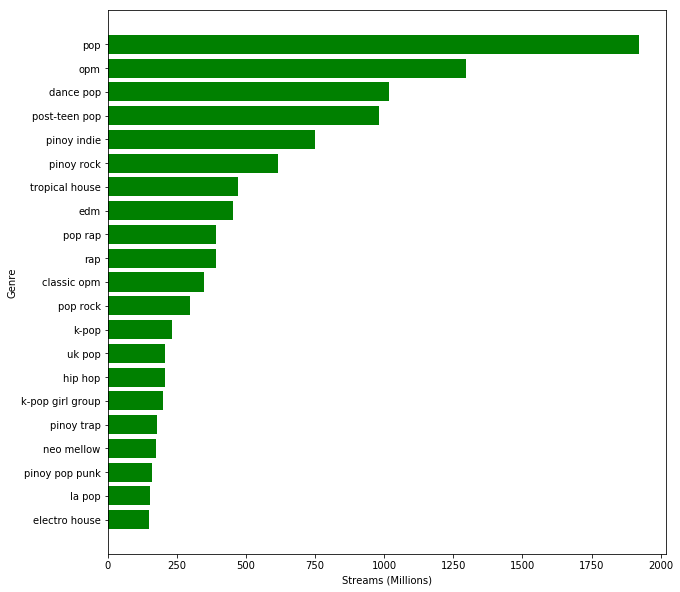

**(10 points)**

Text(0.5, 0, 'Streams (Millions)')

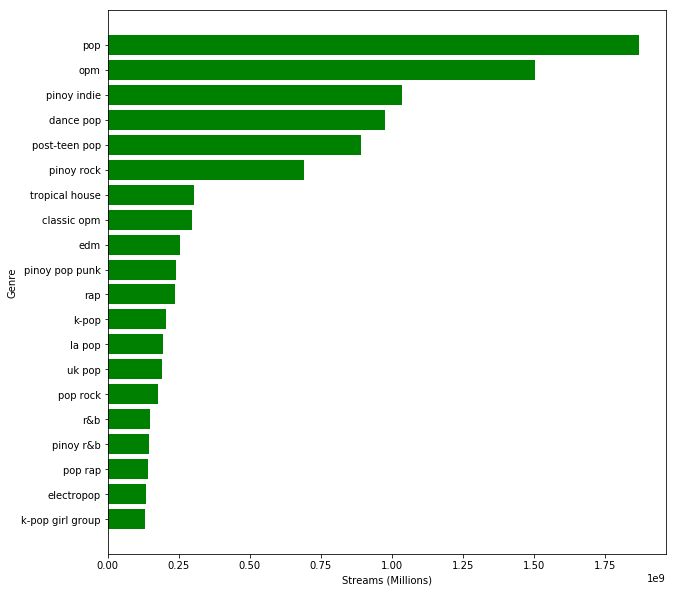

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write your code below

x = genre_df.iloc[0:20,0,]
y = genre_df.iloc[0:20,1]

plt.barh(width=y,y=x,color="Green")
plt.gca().invert_yaxis()

ax.set_ylabel("Genre")
ax.set_xlabel("Streams (Millions)")

#### 4b) Who are the most popular Artists in the Philippines (as measured by stream count) in June 2019?

Plot a **horizontal bar**.

The resulting plot should look something like this:

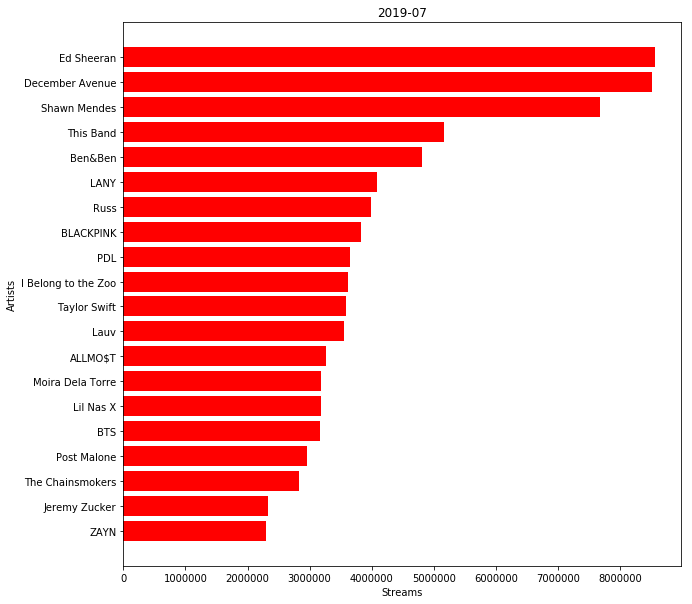

**(10 points)**

In [48]:
artist_list = []
for i in df.loc[:,"Artist"]:
    artist_list.append(i)
artist_set = set(artist_list)
artist_fixed_list = list(artist_set)


june2019_dict = {}


artist_name_list = []
june2019_list = []

count = 0
for i in artist_set:
    artist = artist_fixed_list[count]
    artist_name_list.append(artist)
    count += 1
    
    june2019 = df.loc[(df.loc[:,"Artist"]==i) & (df.loc[:,"chart_month"]=="2019-06"),"Streams"].sum()
    june2019_list.append(june2019)
    
artist_dict = {"artist":artist_name_list}
june2019_dict = {"streams":june2019_list}

june2019_dict.update(artist_dict)
june2019_dict.update(june2019_dict)
    
june2019_dict

june2019_df = pd.DataFrame.from_dict(june2019_dict)
june2019_df = june2019_df.sort_values(by='streams', ascending=False)
june2019_df

streams                    artist
56   15624715           December Avenue
281  10411039                 BLACKPINK
171   9805591                 This Band
112   9647703                Ed Sheeran
0     9177393                   Ben&Ben
228   7598890              Shawn Mendes
147   7534361                      LANY
180   7452643                      Lauv
7     7115369                      Russ
279   7039182                       PDL
42    7018243       I Belong to the Zoo
78    6943650                   ALLMO$T
243   6769565              Taylor Swift
111   5999001                      ZAYN
235   5577519                       BTS
295   5145115          The Chainsmokers
304   4658157               Post Malone
191   4587139                    Khalid
101   4553253                 Lil Nas X
181   4467471             Jeremy Zucker
213   4271544             Ariana Grande
19    4136479          Moira Dela Torre
57    3607260                Marshmello
13    3570611                     Bazzi
27    3558889                 Sam Smith
271   3376629                Katy Perry
225   3356021                 Callalily
166   3249353            Darren Espanto
76    2983297                    Halsey
36    2914157              Lukas Graham
..        ...                       ...
211         0              Clean Bandit
91          0                Charli XCX
89          0                 Bad Bunny
214         0                6cyclemind
215         0               Kodak Black
216         0                 Meek Mill
87          0             Michael Bublé
219         0                  Galantis
81          0                      ITZY
201         0               Bobby Helms
94          0                    Sigala
95          0               Boyz II Men
189         0                      Blue
182         0             Nat King Cole
109         0                  Rita Ora
108         0                Nick Jonas
185         0                Itchyworms
186         0                   6ix9ine
106         0        Donnalyn Bartolome
102         0              Keala Settle
99          0                   J. Cole
198         0            Paul McCartney
98          0              KZ Tandingan
192         0   Girls' Generation-Oh!GG
193         0                    J Boog
97          0  Star Music All Star Cast
195         0                  FLETCHER
196         0                 Passenger
197         0            Leanne & Naara
17          0             Years & Years

[305 rows x 2 columns]

Text(0.5, 0, 'Streams (Hundred Thousands)')

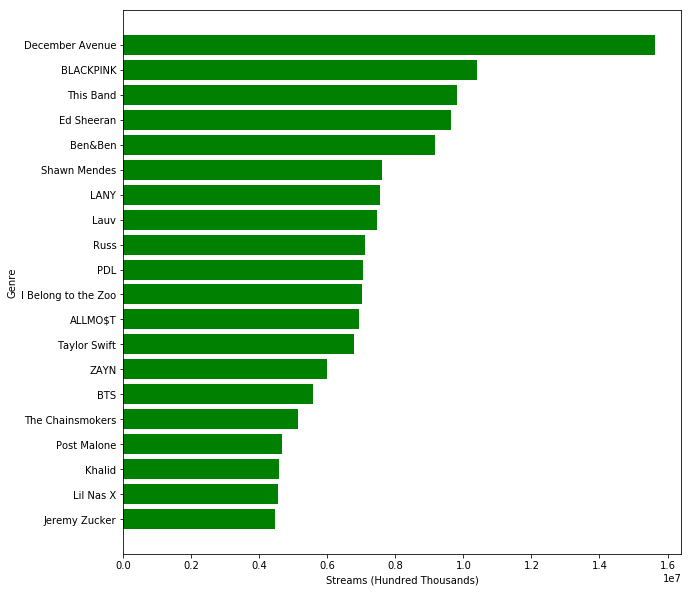

In [49]:
import matplotlib.pyplot as plt

chart_month = "2019-07"

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write code below
## ------------------------

x = june2019_df.iloc[0:20,1]
y = june2019_df.iloc[0:20,0]

plt.barh(width=y,y=x,color="Green")
plt.gca().invert_yaxis()

ax.set_ylabel("Genre")
ax.set_xlabel("Streams (Hundred Thousands)")

#### 4c) What are the average features of the top 10 artists by total stream count?

There are no plots nor graphs in this number. Only display the contents of the resulting dataframe.

Revisit the `mean_audio_features_df` dataframe.  

Only include the top 10 artists by total stream count.  

Hint: Use the `total_streams_per_artist_df` dataframe as basis for your filtering.

Hint: Consider using the `DataFrame.isin(...)` method. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html



**(10 points)**

In [50]:
## write your code below
## ----------------------
top10_df = pd.merge(total_streams_per_artist_df,mean_audio_features_df,on='artist',how="left")
top10_df.loc[0:10,:]
## ----------------------

artist      count   valence  danceability  instrumentalness  \
0       December Avenue  230648949  0.241929      0.502028          0.000004   
1                  LANY  195041003  0.373729      0.664252          0.001171   
2               Ben&Ben  140391135  0.328333      0.516291          0.000037   
3         Ariana Grande  130212637  0.373224      0.685175          0.000637   
4             This Band   97749381  0.249172      0.500404          0.000307   
5      Moira Dela Torre   94930807  0.239077      0.462023          0.000205   
6   I Belong to the Zoo   90818854  0.350533      0.602156          0.000000   
7             BLACKPINK   87164814  0.459912      0.688838          0.000109   
8            Ed Sheeran   75345317  0.374960      0.638448          0.000192   
9           Post Malone   74120346  0.503568      0.721909          0.000001   
10                 Lauv   67790367  0.409994      0.674491          0.000001   

    liveness   loudness      mode  speechiness  
0   0.141317  -5.040302  0.836923     0.030816  
1   0.142292  -7.953280  0.761388     0.081782  
2   0.134859  -9.314495  1.000000     0.035579  
3   0.177576  -6.263399  0.585551     0.100912  
4   0.113273  -9.326040  1.000000     0.034455  
5   0.178408 -10.057548  0.950192     0.035486  
6   0.190533  -8.468911  1.000000     0.029338  
7   0.180181  -3.301558  0.476923     0.088276  
8   0.115834  -7.071730  0.850806     0.044580  
9   0.114934  -6.567761  0.772727     0.084250  
10  0.156284  -7.400868  1.000000     0.150701

In [81]:
## remnants from a previous test shown below for your reference

Artist  danceability  liveness  instrumentalness  loudness  \
48   I Belong to the Zoo      0.644144  0.137991          0.000741 -6.630278   
83             This Band      0.629253  0.159965          0.000426 -5.812404   
85       December Avenue      0.628997  0.137791          0.001221 -6.678929   
96            Ed Sheeran      0.625694  0.153446          0.000421 -7.570371   
112     Moira Dela Torre      0.622172  0.145804          0.001324 -7.022598   
113                 LANY      0.622152  0.134362          0.000711 -7.016731   
155            BLACKPINK      0.610681  0.139826          0.000897 -7.183369   
166        Ariana Grande      0.607673  0.151281          0.000641 -7.143418   
168          Post Malone      0.607415  0.134897          0.000432 -7.277227   
183              Ben&Ben      0.600874  0.133243          0.000565 -6.575432   

     speechiness   valence      mode  
48      0.063766  0.407811  0.811111  
83      0.102412  0.443444  0.737374  
85      0.063375  0.409468  0.781538  
96      0.056863  0.406998  0.838710  
112     0.063144  0.409754  0.793103  
113     0.068505  0.412306  0.778742  
155     0.061725  0.402831  0.819231  
166     0.070895  0.392934  0.787072  
168     0.068336  0.407632  0.772727  
183     0.084477  0.412601  0.752427

#### 4d) Which are the 10 most danceable artists who have made it in the Top 200 charts?

Plot a horizontal bar graph of these top 10 Danceable Artists.

Your resulting plot should look something like this.

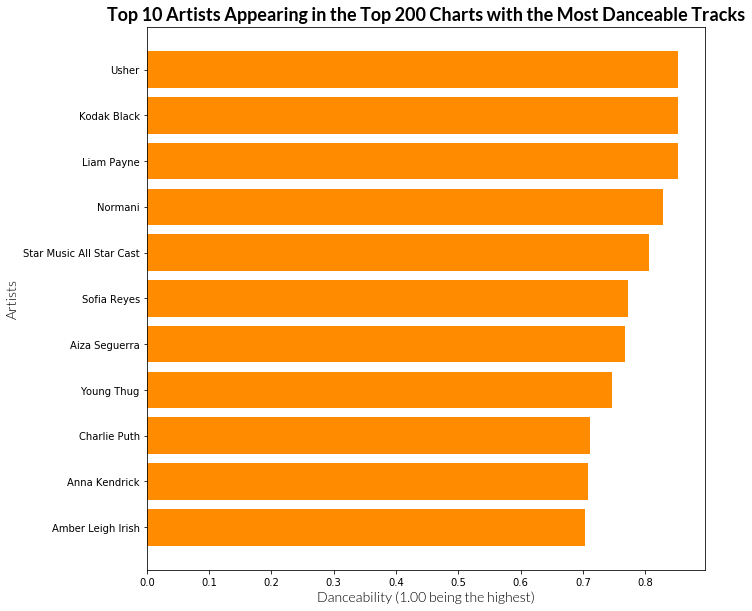

**(10 points)**

Text(0.5, 0, 'Danceability (1.00 being the highest)')

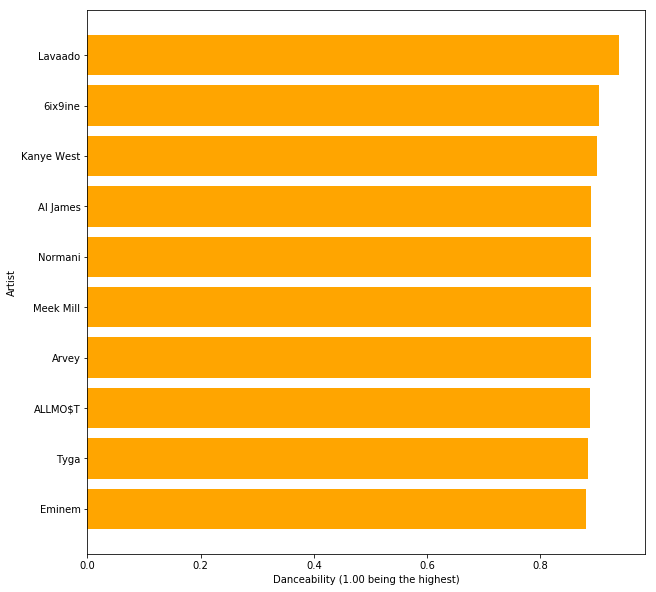

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

title_font = {"fontweight":"bold", "fontfamily":"Lato", "fontsize":18}
label_font = {"fontfamily":"Lato", "fontsize":14}

## write code below
## -----------------

x = mean_audio_features_df.iloc[0:10,0]
y = mean_audio_features_df.iloc[0:10,2]

plt.barh(width=y,y=x,color="Orange")
plt.gca().invert_yaxis()

ax.set_ylabel("Artist")
ax.set_xlabel("Danceability (1.00 being the highest)")

#### 4e) Staying power

No plots/graphs for this question. Simply dump the output below the cell containing your code.

Which artists stayed for 52 weeks in the charts? 

Prepare a new dataframe `artist_stay_df` that shows the number of periods (weeks) each Artist was included in the Top 200 Charts.

**Hint:** It's possible that one artist can have several tracks in the Top 200 all at at the same time, but we need to count this stay only once. Use `DataFrame.drop_duplicates()` to get unique rows.

Also try to sort by "weeks" in descending order.

**(10 points)**

In [52]:
## write code below
## ---------------------
artist_short_df = df.loc[:,["Artist","Streams","begin_date"]]

artist_list = []
for i in artist_short_df.loc[:,"Artist"]:
    artist_list.append(i)
artist_set = set(artist_list)
artist_fixed_list = list(artist_set)

artist_stay_dict = {}

artist_name_list = []
weeks_list = []

count = 0
for i in artist_set:
    artist = artist_fixed_list[count]
    artist_name_list.append(artist)
    count += 1
    
    weeks = (artist_short_df.loc[(artist_short_df.loc[:,"Artist"]==i),"begin_date"].drop_duplicates()).count()
    weeks_list.append(weeks)
    
artist_dict = {"artist":artist_name_list}
weeks_dict = {"weeks":weeks_list}

artist_stay_dict.update(artist_dict)
artist_stay_dict.update(weeks_dict)
    
artist_stay_dict

artist_stay_df1 = pd.DataFrame.from_dict(artist_stay_dict)
artist_stay_df1 = artist_stay_df1.sort_values(by='weeks', ascending=False)
artist_stay_df = artist_stay_df1.loc[(artist_stay_df1.loc[:,"weeks"]==52),:]
artist_stay_df
## ---------------------

artist  weeks
0               Ben&Ben     52
47                 MYMP     52
174         Mark Carpio     52
166      Darren Espanto     52
147                LANY     52
141                Hale     52
132            Maroon 5     52
124        IV Of Spades     52
121               Ne-Yo     52
119          Jason Mraz     52
113         Eraserheads     52
112          Ed Sheeran     52
104        benny blanco     52
90            Zac Efron     52
88               H.E.R.     52
73           Moonstar88     52
57           Marshmello     52
56      December Avenue     52
54          Shanti Dope     52
180                Lauv     52
187    Parokya Ni Edgar     52
191              Khalid     52
272    Hailee Steinfeld     52
296            Dua Lipa     52
295    The Chainsmokers     52
285            John Roa     52
282          Anne-Marie     52
281           BLACKPINK     52
280             Rihanna     52
276       Janine Teñoso     52
236                 SUD     52
194                Zedd     52
225           Callalily     52
220    Silent Sanctuary     52
218        Selena Gomez     52
217  The Pussycat Dolls     52
213       Ariana Grande     52
210     Orange & Lemons     52
206        South Border     52
53   Michael Pangilinan     52
304         Post Malone     52
27            Sam Smith     52
13                Bazzi     52
19     Moira Dela Torre     52
15    The Goo Goo Dolls     52
18         James Arthur     52
14       Up Dharma Down     52
9           Calum Scott     52

In [85]:
## remnants from a previous test shown below for your reference

Artist  weeks
40              Ben&Ben     52
57            Callalily     52
105              H.E.R.     52
257    Silent Sanctuary     52
37                Bazzi     52
80      December Avenue     52
253         Shanti Dope     52
252        Selena Gomez     52
164                LANY     52
249           Sam Smith     52
245                 SUD     52
167                Lauv     52
236             Rihanna     52
228         Post Malone     52
224    Parokya Ni Edgar     52
58          Calum Scott     52
261        South Border     52
92          Eraserheads     52
188                MYMP     52
221     Orange & Lemons     52
213               Ne-Yo     52
132            John Roa     52
209          Moonstar88     52
208    Moira Dela Torre     52
88           Ed Sheeran     52
195         Mark Carpio     52
85             Dua Lipa     52
205  Michael Pangilinan     52
75       Darren Espanto     52
197            Maroon 5     52
32            BLACKPINK     52
198          Marshmello     52
106    Hailee Steinfeld     52
121        James Arthur     52
112        IV Of Spades     52
297           Zac Efron     52
155              Khalid     52
299                Zedd     52
301        benny blanco     52
275  The Pussycat Dolls     52
274   The Goo Goo Dolls     52
24           Anne-Marie     52
25        Ariana Grande     52
273    The Chainsmokers     52
123       Janine Teñoso     52
125          Jason Mraz     52
107                Hale     52
285      Up Dharma Down     52